# Big 6 energy company stock price prediction

In [1]:
import yfinance as yf
# matplotlib to plot stuff
import matplotlib.pyplot as plt
# for dataframe creation
import pandas as pd
# for arrays 
import numpy as np
import math
# for creating the lstm model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
# parameters for the lstm model
from keras.layers import LSTM, Dense, Dropout
import seaborn as sns
#sns.set_style('whitegrid')
#plt.style.use("fivethirtyeight")
from datetime import datetime
# for normalising dataset 
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import datetime as dt
from tensorflow.keras.optimizers import Adam
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from stock_data_modules.stock_data import *
from stock_data_modules.lstm_standalone import *


In [2]:
# here are the 6 larget energy companies by market cap
big_6 = {"NextEra_energy":"NEE", "Duke_Energy_Corp":"DUK", "Southern_CO":"SO","Dominion_Energy":"D", 
         "National_Grid_plc":"NGG", "American_Electric_Power_Company_Inc":"AEP"}
big_6_list = ["NEE", "DUK", "SO","D", "NGG", "AEP"]

In [3]:
# will return stock OHLC price, volume and ticker label from any stock you wish in our case we will use the big 6 
# we will use data from 2020 as thats when covid started we can go back to any date however 
df = stocks_in_one_dataset("NEE", "DUK", "SO","D", "NGG", "AEP")
df

Enter start date: 2020-01-01
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2022-07-18  94.970001  94.970001  93.260002  93.370003  93.370003  2354100   
2022-07-19  94.290001  94.290001  93.389999  93.589996  93.589996  2568900   
2022-07-20  93.860001  94.029999  92.190002  92.709999  92.709999  2293300   
2022-07-21  92.459999  92.849998  92.059998  92.790001  92.790001  2061600   
2022-07-22  93.540001  94.360001  93.190002  94.349998  94.349998  1870100   

          

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2020-01-02,60.492500,60.919998,59.487499,59.654999,56.682976,7884800,NEE
2020-01-03,59.657501,60.340000,59.535000,60.080002,57.086796,7097200,NEE
2020-01-06,60.174999,60.650002,60.105000,60.380001,57.371853,5518800,NEE
2020-01-07,60.172501,60.552502,60.042500,60.327499,57.321964,6653200,NEE
2020-01-08,60.417500,60.737499,60.250000,60.299999,57.295834,5936000,NEE
...,...,...,...,...,...,...,...
2022-07-18,94.970001,94.970001,93.260002,93.370003,93.370003,2354100,AEP
2022-07-19,94.290001,94.290001,93.389999,93.589996,93.589996,2568900,AEP
2022-07-20,93.860001,94.029999,92.190002,92.709999,92.709999,2293300,AEP


Please enter start date(format YYYY-MM-DD): 2020-01-01
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


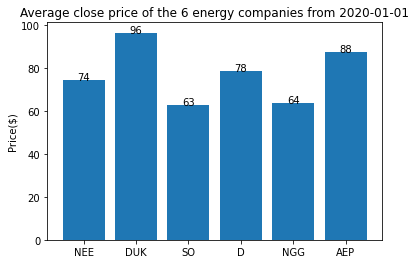

In [4]:
# this is the mean average close price of the stocks in the big 6, you can get from any date
plot_mean_average_close_price("NEE", "DUK", "SO","D", "NGG", "AEP")

**Duke energy has had the highest close price on average since 2020 the lowest average price is next era enegy**

Enter start date in y-m-d format: 2020-01-01
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


<Figure size 1152x576 with 0 Axes>

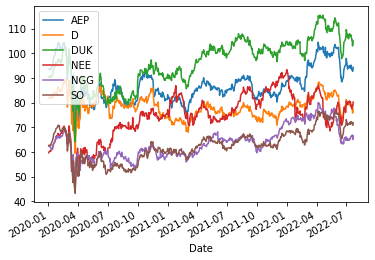

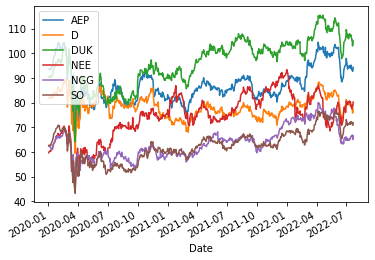

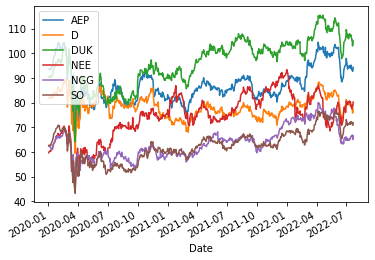

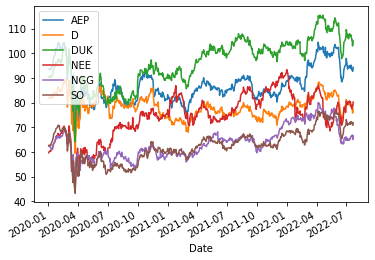

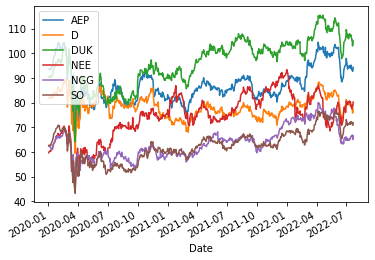

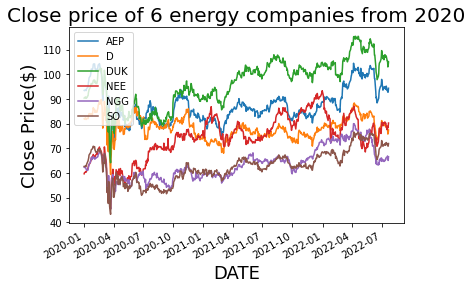

In [5]:
# This is a plot of the trend of the average close price of the big 6 energy companies
plot_stocks_close("NEE", "DUK", "SO","D", "NGG", "AEP")

In [6]:
# lets get a summary of the lowest stock avg price and highest avg close price
DUK_summary = retrieve_stock_summary()
SO_summary = retrieve_stock_summary()

Enter ticker label of the stock you wish to summarise: DUK
Enter stock start date (y-m-d format): 2020-01-01
Enter ticker label of the stock you wish to summarise: SO
Enter stock start date (y-m-d format): 2020-01-01


In [7]:
SO_summary

,High,Low,Open,Close,Volume,Adj Close,Stock
count,644.000000,644.000000,644.000000,644.000000,6.440000e+02,644.000000,SO
mean,63.367935,62.083401,62.723028,62.741615,4.648376e+06,59.864191,SO
std,6.128883,6.293171,6.219298,6.228632,1.797017e+06,7.355572,SO
min,45.840000,41.959999,45.570000,43.230000,8.580000e+05,39.341553,SO
25%,59.535000,58.137500,58.767500,58.732501,3.454400e+06,54.889215,SO
50%,63.225000,62.330000,62.715000,62.735001,4.150200e+06,60.446085,SO
75%,67.355001,66.120001,66.707499,66.802500,5.395000e+06,64.026184,SO
max,77.239998,76.400002,76.910004,76.510002,1.556760e+07,76.070000,SO


In [8]:
DUK_summary

,High,Low,Open,Close,Volume,Adj Close,Stock
count,644.000000,644.000000,644.000000,644.000000,6.440000e+02,644.000000,DUK
mean,97.348649,95.422873,96.373183,96.391910,3.263601e+06,92.186388,DUK
std,9.275628,9.514058,9.399706,9.411518,1.355322e+06,11.275528,DUK
min,67.930000,62.130001,66.389999,64.150002,7.335000e+05,58.575405,DUK
25%,90.764997,89.035000,89.752501,90.050003,2.449350e+06,84.079723,DUK
50%,99.155003,97.544998,98.184998,98.410000,2.995550e+06,93.966522,DUK
75%,104.157499,102.542501,103.224998,103.199997,3.694850e+06,100.728615,DUK
max,116.330002,115.169998,115.510002,115.430000,1.880490e+07,114.400002,DUK


It seems as if Southern Co is more consistent with prices as the standard deviation is lower 

[*********************100%***********************]  1 of 1 completed


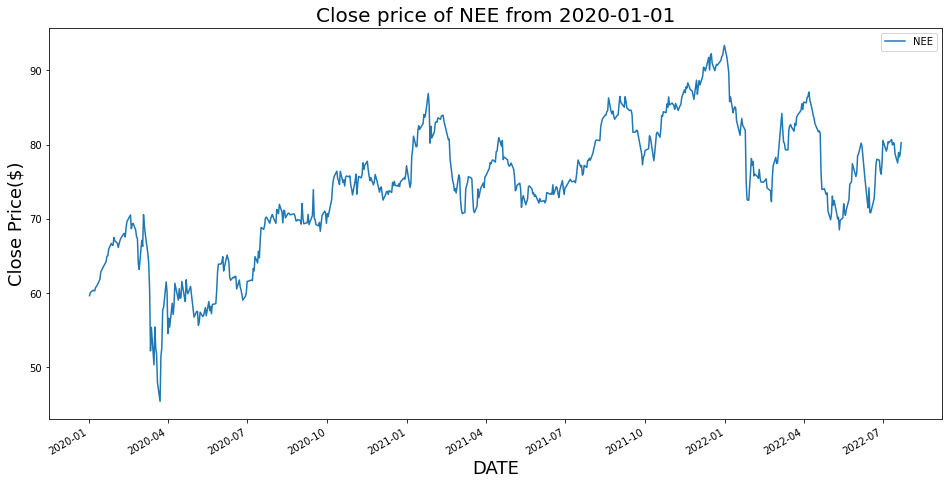

2022-07-24 21:19:05.527990: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None
317/456 [===================>..........] - ETA: 5s - loss: 0.0075

KeyboardInterrupt: 

In [9]:
for stock in big_6_list:
    lstm_standalone_stock(stock, "2020-01-01")

## oil prices

Oil price per barrel is one feature that will be used to predict the next day stock price. Energy companies use crude oil to produce energy so crude oil prices in essence should have an impact on the stock prices. 

In [10]:
from stock_data_modules.oil_prices import *
oil_prices()

Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


,oil_price_per_barrel
Date,
2022-07-11,114.85
2022-07-08,113.95
2022-07-07,113.40
2022-07-06,108.54
2022-07-05,110.49
...,...
2020-01-08,67.31
2020-01-07,68.74
2020-01-06,70.25


Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


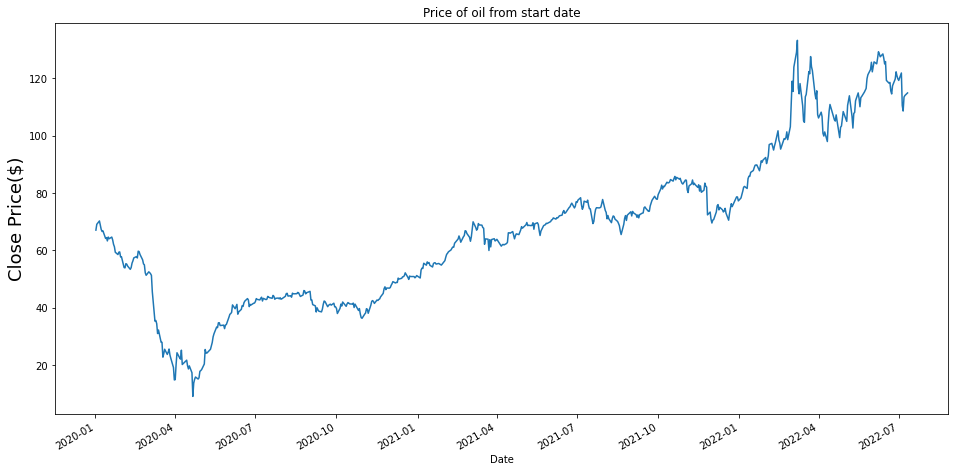

In [11]:
oil_price_graph()

This is a plot of the price of oil from the beginning of 2020. We can see that the price of oil had dropped the most during the month of April 2020, this is likely due to lack of demand as a result of worldwide lockdowns. The price of crude oil now is roughly 6 times the amount it was in April, this is a large increase

## Consumer price index

Consumer price index measures inflation. Inflation would have an impact on stock price, so it should have an impact on stock price

In [12]:
from stock_data_modules.consumer_price_index import *
cpi = get_CPI()
print(cpi)

Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
            CPI_rate_US  CPI_rate_UK
Date                                
2020-01-01          0.0          0.1
2020-01-02          0.0          0.1
2020-01-03          0.0          0.1
2020-01-04          0.0          0.1
2020-01-05          0.0          0.1
...                 ...          ...
2022-05-28          6.1          0.3
2022-05-29          6.1          0.3
2022-05-30          6.1          0.3
2022-05-31          6.1          0.3
2022-06-01          7.6          0.3

[883 rows x 2 columns]


Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01


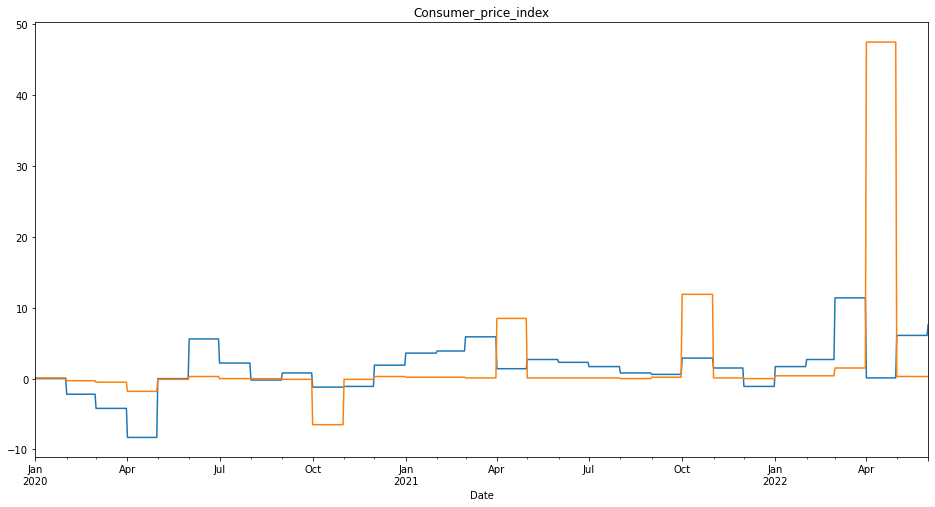

In [13]:
plot_CPI()

## combined data

In [14]:
from stock_data_modules.combined_dataset import *

for stock in big_6_list:
    print(combined_stock_dataset(stock))

Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
            oil_price_per_barrel  Close_price_NEE  CPI_rate_US  CPI_rate_UK
Date                                                                       
2022-06-01                122.20        76.169998          7.6          0.3
2022-05-31                125.53        75.690002          6.1          0.3
2022-05-27                121.19        77.430000          6.1          0.3
2022-05-26                119.81        75.040001          6.1          0.3
2022-05-25                116.41        74.790001          6.1          0.3
...                          ...              ...          ...          ...
2020-01-08                 67.31        60.299999          0.0          0.1
2020-01-07                 68.74        60.327499          0.0          0.1
2020-01-06                 70.25        60.380001          0.0          0.1
2020-01-03                 6

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
            oil_price_per_barrel  Close_price_DUK  CPI_rate_US  CPI_rate_UK
Date                                                                       
2022-06-01                122.20       111.669998          7.6          0.3
2022-05-31                125.53       112.519997          6.1          0.3
2022-05-27                121.19       114.400002          6.1          0.3
2022-05-26                119.81       113.230003          6.1          0.3
2022-05-25                116.41       112.389999          6.1          0.3
...                          ...              ...          ...          ...
2020-01-08                 67.31        90.400002          0.0          0.1
2020-01-07                 68.74        90.269997          0.0          0.1
2020-01-06                 70.25        90.839996          0.0          0.1
2020-01-03                 6

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
            oil_price_per_barrel  Close_price_SO  CPI_rate_US  CPI_rate_UK
Date                                                                      
2022-06-01                122.20       75.550003          7.6          0.3
2022-05-31                125.53       75.660004          6.1          0.3
2022-05-27                121.19       76.070000          6.1          0.3
2022-05-26                119.81       75.290001          6.1          0.3
2022-05-25                116.41       75.690002          6.1          0.3
...                          ...             ...          ...          ...
2020-01-08                 67.31       62.599998          0.0          0.1
2020-01-07                 68.74       62.619999          0.0          0.1
2020-01-06                 70.25       62.810001          0.0          0.1
2020-01-03                 69.08       

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
            oil_price_per_barrel  Close_price_D  CPI_rate_US  CPI_rate_UK
Date                                                                     
2022-06-01                122.20      83.709999          7.6          0.3
2022-05-31                125.53      84.220001          6.1          0.3
2022-05-27                121.19      85.160004          6.1          0.3
2022-05-26                119.81      84.580002          6.1          0.3
2022-05-25                116.41      84.660004          6.1          0.3
...                          ...            ...          ...          ...
2020-01-08                 67.31      81.690002          0.0          0.1
2020-01-07                 68.74      82.209999          0.0          0.1
2020-01-06                 70.25      82.389999          0.0          0.1
2020-01-03                 69.08      81.760002   

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
            oil_price_per_barrel  Close_price_NGG  CPI_rate_US  CPI_rate_UK
Date                                                                       
2022-06-01                122.20        72.489998          7.6          0.3
2022-05-31                125.53        74.379997          6.1          0.3
2022-05-27                121.19        74.150002          6.1          0.3
2022-05-26                119.81        75.040001          6.1          0.3
2022-05-25                116.41        77.790001          6.1          0.3
...                          ...              ...          ...          ...
2020-01-08                 67.31        61.619999          0.0          0.1
2020-01-07                 68.74        61.900002          0.0          0.1
2020-01-06                 70.25        62.169998          0.0          0.1
2020-01-03                 6

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
            oil_price_per_barrel  Close_price_AEP  CPI_rate_US  CPI_rate_UK
Date                                                                       
2022-06-01                122.20       102.040001          7.6          0.3
2022-05-31                125.53       102.029999          6.1          0.3
2022-05-27                121.19       103.570000          6.1          0.3
2022-05-26                119.81       102.580002          6.1          0.3
2022-05-25                116.41       102.480003          6.1          0.3
...                          ...              ...          ...          ...
2020-01-08                 67.31        93.410004          0.0          0.1
2020-01-07                 68.74        93.690002          0.0          0.1
2020-01-06                 70.25        93.669998          0.0          0.1
2020-01-03                 6

In [15]:
from stock_data_modules.lstm_combined_dataset import *

How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 128)            68096     
                                                                 
 lstm_13 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 25)                1625      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 119,155
Trainable params: 119,155
Non-trainable params: 0
_________________________________________________________________
None
479/479 [==============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


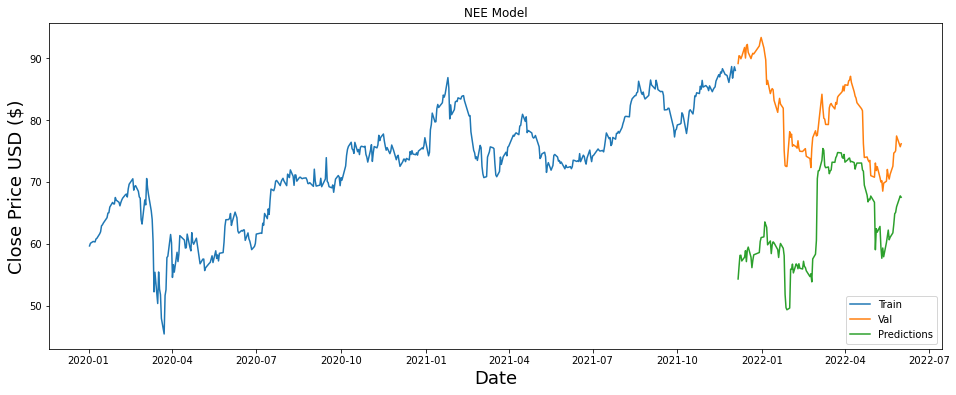

the rmse for NEE is 19.582939533062365
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 128)            68096     
                                                                 
 lstm_15 (LSTM)              (None, 64)                49408     
                                                                 
 dense_14 (Dense)            (None, 25)                1625      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 119,155
Trainable params: 119,155
Non-trainable params: 0
_________________________________________________________________
None
479/479 [==============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


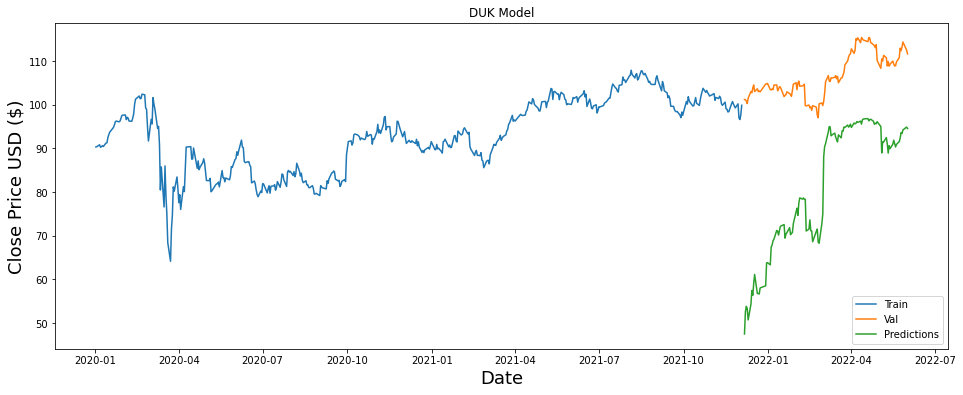

the rmse for DUK is 29.611819048220607
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 128)            68096     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_16 (Dense)            (None, 25)                1625      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 119,155
Trainable params: 119,155
Non-trainable params: 0
_________________________________________________________________
None
479/479 [==============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


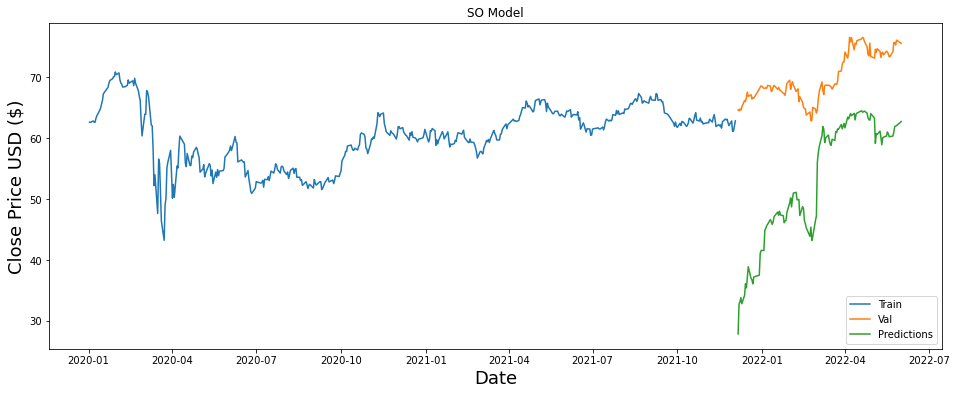

the rmse for SO is 19.941576987715184
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 128)            68096     
                                                                 
 lstm_19 (LSTM)              (None, 64)                49408     
                                                                 
 dense_18 (Dense)            (None, 25)                1625      
                                                                 
 dense_19 (Dense)            (None, 1)                 26        
                                                                 
Total params: 119,155
Trainable params: 119,155
Non-trainable params: 0
_________________________________________________________________
None
479/479 [==============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


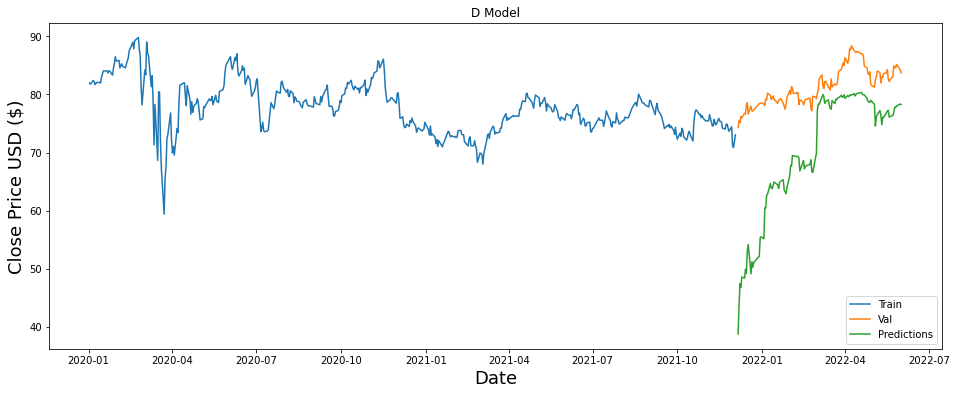

the rmse for D is 15.63634896572876
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 128)            68096     
                                                                 
 lstm_21 (LSTM)              (None, 64)                49408     
                                                                 
 dense_20 (Dense)            (None, 25)                1625      
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 119,155
Trainable params: 119,155
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


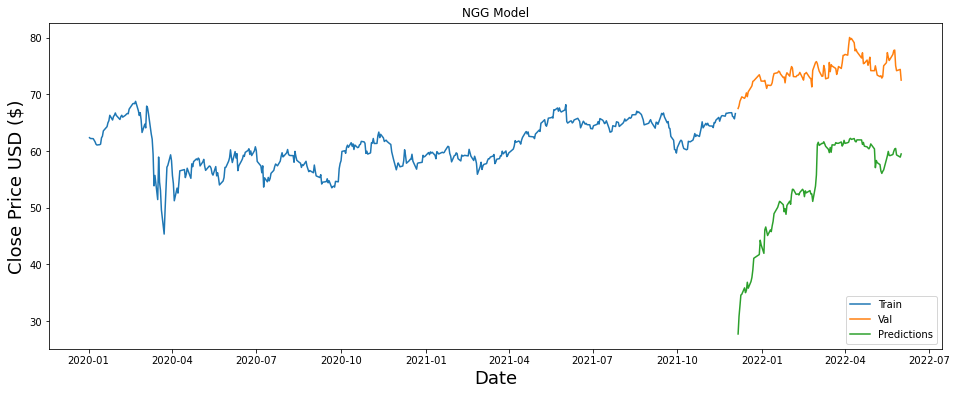

the rmse for NGG is 22.25746226759052
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 1, 128)            68096     
                                                                 
 lstm_23 (LSTM)              (None, 64)                49408     
                                                                 
 dense_22 (Dense)            (None, 25)                1625      
                                                                 
 dense_23 (Dense)            (None, 1)                 26        
                                                                 
Total params: 119,155
Trainable params: 119,155
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


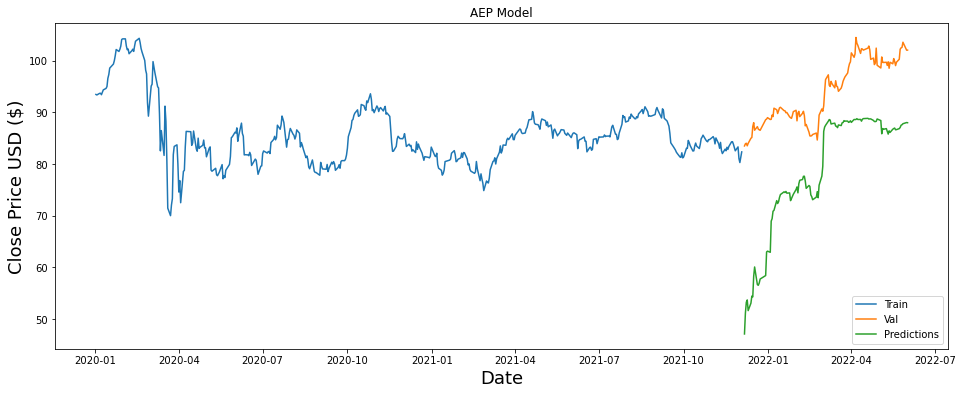

the rmse for AEP is 19.999126882046017


In [19]:
for stock in big_6_list:
    lstm_combined_dataset_all(stock)

Turns out RMSE is worse when using other factors such as the uk and us inflation rate and oil prices by quite a bit 

How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 1, 128)            66560     
                                                                 
 lstm_27 (LSTM)              (None, 64)                49408     
                                                                 
 dense_26 (Dense)            (None, 25)                1625      
                                                                 
 dense_27 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


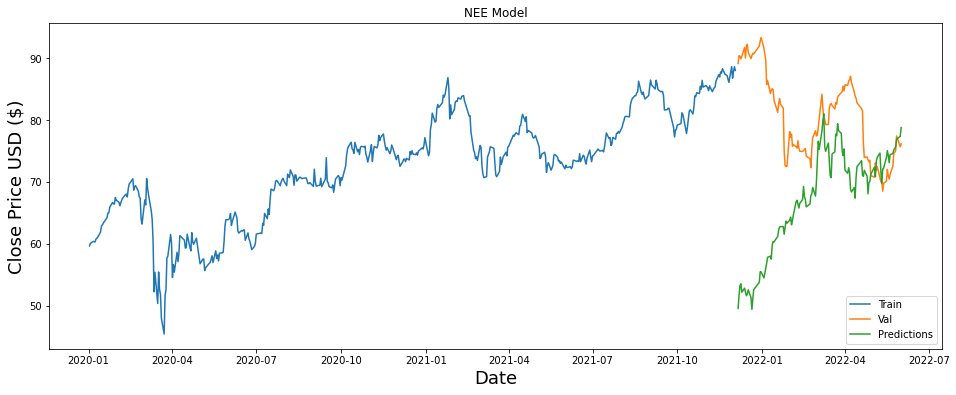

the rmse for NEE is 16.967911635674994
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 1, 128)            66560     
                                                                 
 lstm_29 (LSTM)              (None, 64)                49408     
                                                                 
 dense_28 (Dense)            (None, 25)                1625      
                                                                 
 dense_29 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


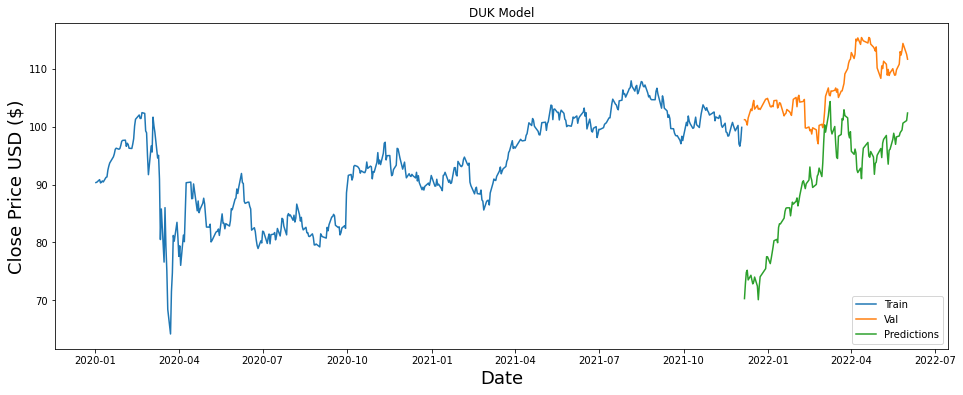

the rmse for DUK is 19.136257268339655
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 1, 128)            66560     
                                                                 
 lstm_31 (LSTM)              (None, 64)                49408     
                                                                 
 dense_30 (Dense)            (None, 25)                1625      
                                                                 
 dense_31 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


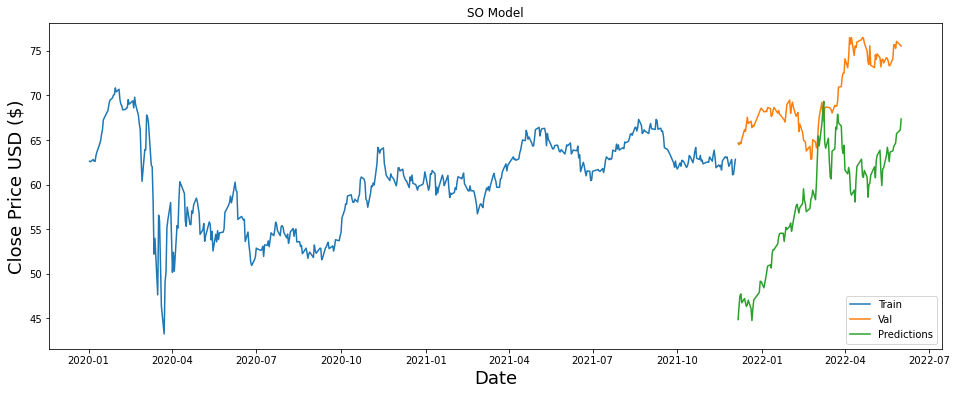

the rmse for SO is 13.982575065678287
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 1, 128)            66560     
                                                                 
 lstm_33 (LSTM)              (None, 64)                49408     
                                                                 
 dense_32 (Dense)            (None, 25)                1625      
                                                                 
 dense_33 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


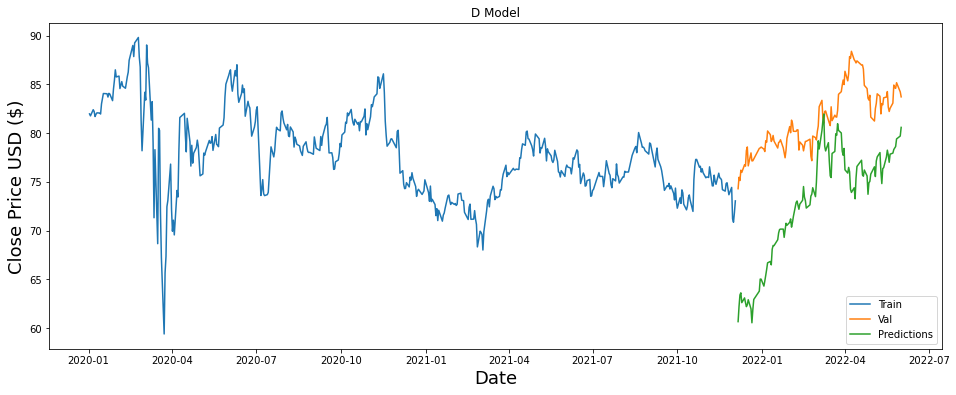

the rmse for D is 10.536787932563946
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 1, 128)            66560     
                                                                 
 lstm_35 (LSTM)              (None, 64)                49408     
                                                                 
 dense_34 (Dense)            (None, 25)                1625      
                                                                 
 dense_35 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


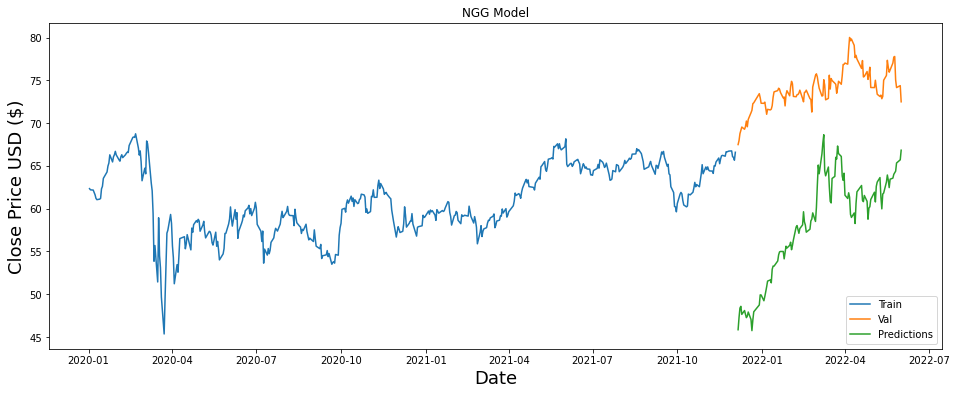

the rmse for NGG is 17.005232694655586
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 1, 128)            66560     
                                                                 
 lstm_37 (LSTM)              (None, 64)                49408     
                                                                 
 dense_36 (Dense)            (None, 25)                1625      
                                                                 
 dense_37 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


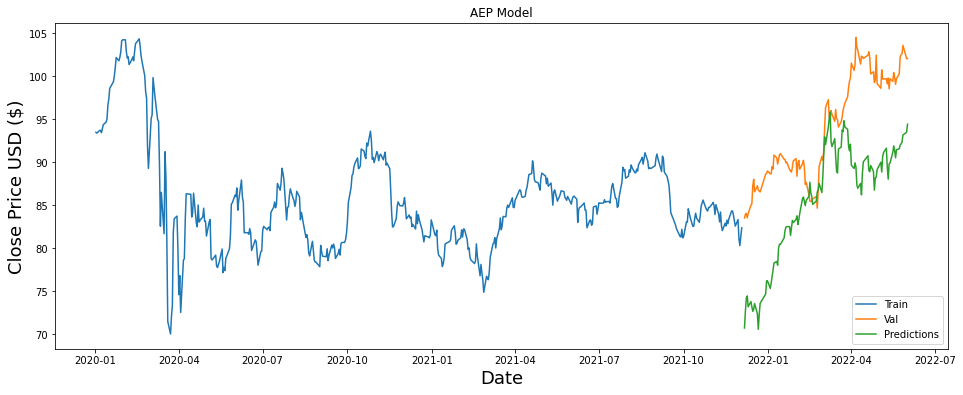

the rmse for AEP is 12.215468649608662


In [22]:
for stock in big_6_list:
    lstm_combined_dataset_oil(stock)

My RMSE is lower when conflating close price with oil prices then using oil and inflation

How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 1, 128)            67584     
                                                                 
 lstm_41 (LSTM)              (None, 64)                49408     
                                                                 
 dense_40 (Dense)            (None, 25)                1625      
                                                                 
 dense_41 (Dense)            (None, 1)                 26        
                                                                 
Total params: 118,643
Trainable params: 118,643
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


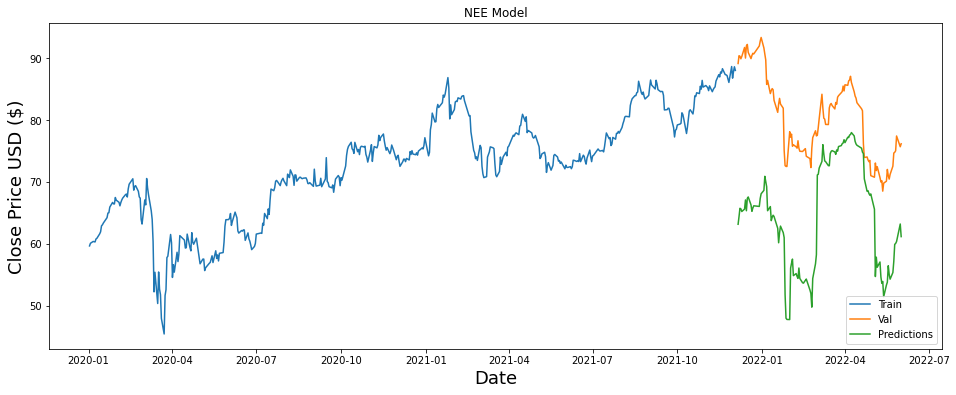

the rmse for NEE is 19.223101816829615
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 1, 128)            67584     
                                                                 
 lstm_43 (LSTM)              (None, 64)                49408     
                                                                 
 dense_42 (Dense)            (None, 25)                1625      
                                                                 
 dense_43 (Dense)            (None, 1)                 26        
                                                                 
Total params: 118,643
Trainable params: 118,643
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


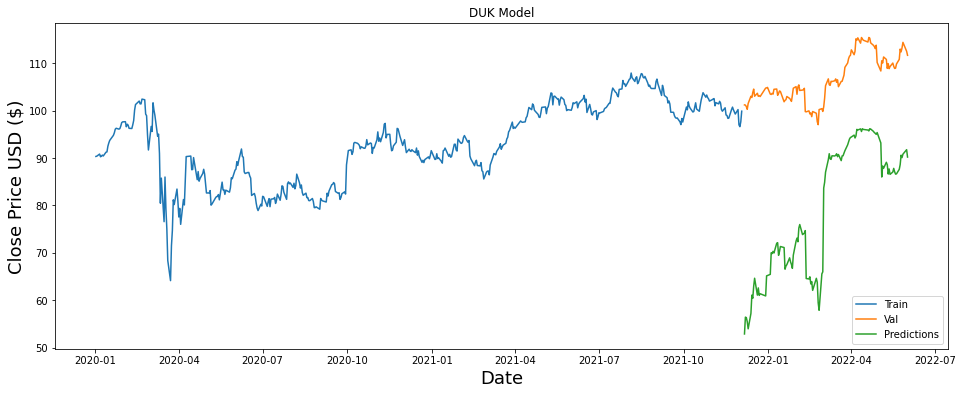

the rmse for DUK is 30.90319732259589
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 1, 128)            67584     
                                                                 
 lstm_45 (LSTM)              (None, 64)                49408     
                                                                 
 dense_44 (Dense)            (None, 25)                1625      
                                                                 
 dense_45 (Dense)            (None, 1)                 26        
                                                                 
Total params: 118,643
Trainable params: 118,643
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


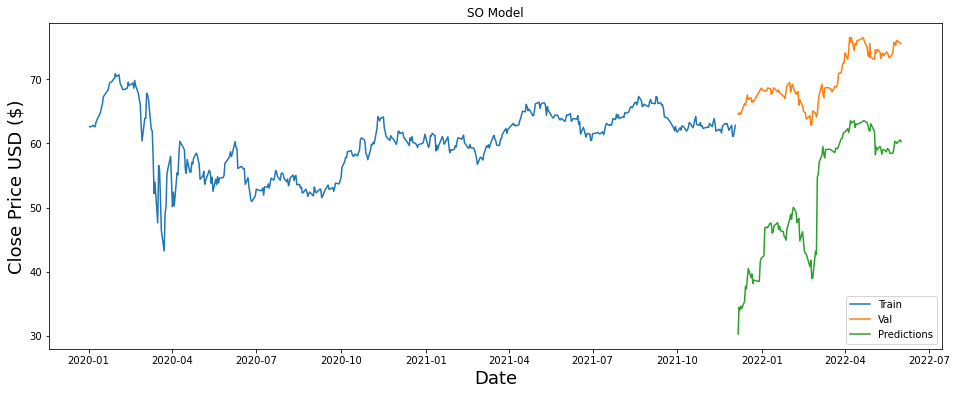

the rmse for SO is 20.419686781094974
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 1, 128)            67584     
                                                                 
 lstm_47 (LSTM)              (None, 64)                49408     
                                                                 
 dense_46 (Dense)            (None, 25)                1625      
                                                                 
 dense_47 (Dense)            (None, 1)                 26        
                                                                 
Total params: 118,643
Trainable params: 118,643
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


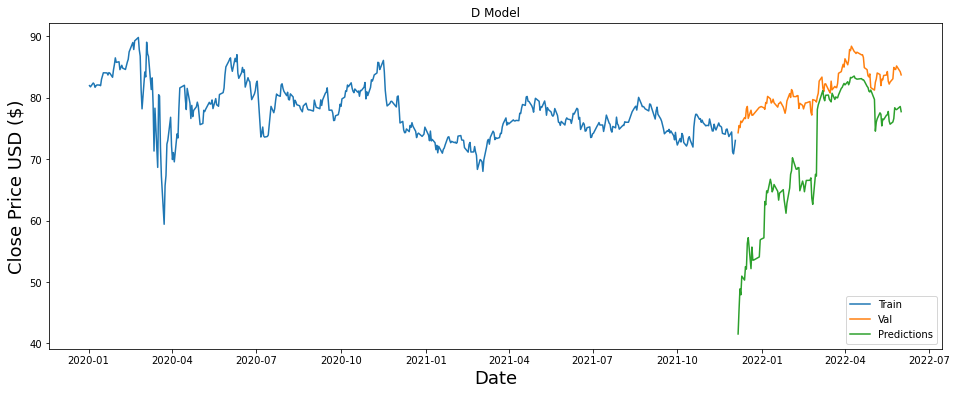

the rmse for D is 15.02230563917529
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 1, 128)            67584     
                                                                 
 lstm_49 (LSTM)              (None, 64)                49408     
                                                                 
 dense_48 (Dense)            (None, 25)                1625      
                                                                 
 dense_49 (Dense)            (None, 1)                 26        
                                                                 
Total params: 118,643
Trainable params: 118,643
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


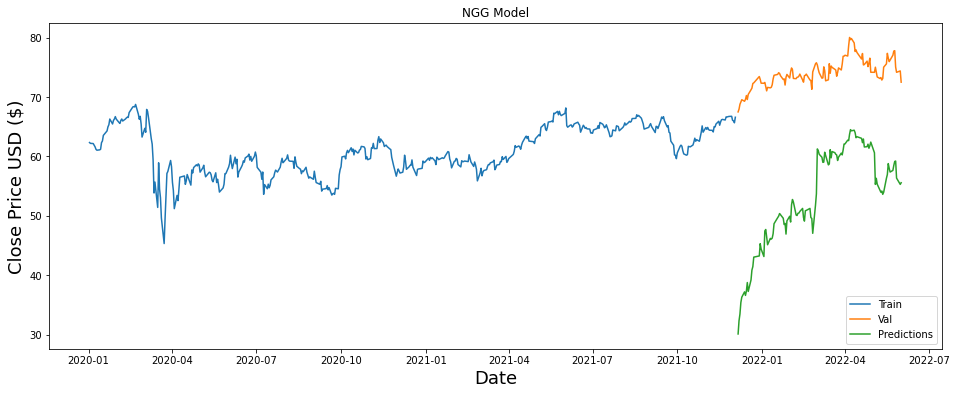

the rmse for NGG is 22.51368064925706
How many timesteps do you wish to use?: 1
Enter start date in y-m-d format: 2020-01-01


/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/oil_prices.py:47: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  oil_prices = oil_prices.loc[date:]


Enter stock start date (y-m-d format): 2020-01-01
Please enter start date, cannot be earlier than 01-02-1988 (format Y-M-D): 2020-01-01
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 1, 128)            67584     
                                                                 
 lstm_51 (LSTM)              (None, 64)                49408     
                                                                 
 dense_50 (Dense)            (None, 25)                1625      
                                                                 
 dense_51 (Dense)            (None, 1)                 26        
                                                                 
Total params: 118,643
Trainable params: 118,643
Non-trainable params: 0
_________________________________________________________________
None
479/479 [=============================

/Users/samkd/Documents/loughborough_work/research_project/research/python_stock_package/stock_data_modules/lstm_combined_dataset.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


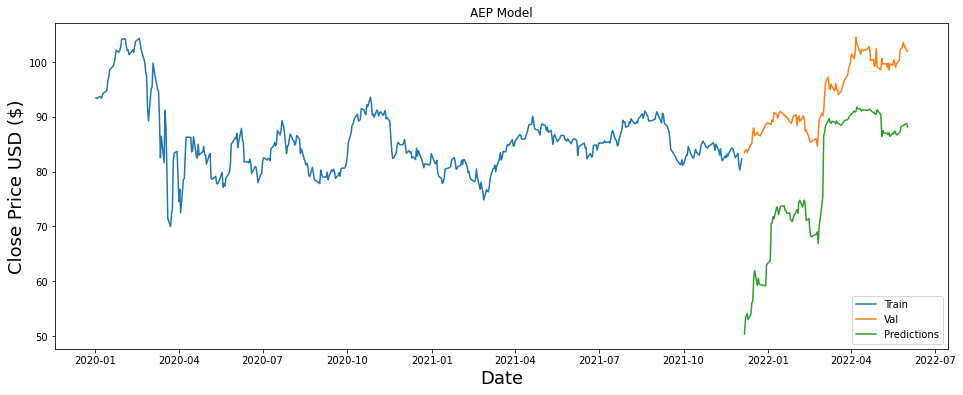

the rmse for AEP is 20.231029015727298


In [24]:
for stock in big_6_list:
    lstm_combined_dataset_cpi(stock)

The RMSE is still higher than both close price alone and is roughly the same as the all features LSTM but performed worse than the oil/close price LSTM